# Libraries

In [2]:
from datetime import datetime, timedelta

import yfinance as yf

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#  Vars

In [3]:
symbols = [
    'AAPL',
    'MSFT',
    'META',
    'TSLA',
    'AMD',
    'AU',
    'AEM',
    'GFI'
]

pre_covid = "2020-01-01"

yesterday: str = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')
days_ago_hour: str = (datetime.today() - timedelta(days=720)).strftime('%Y-%m-%d')
today = datetime.today().strftime('%Y-%m-%d')

data = yf.download(symbols, start=pre_covid, end=today, interval="1d")
portfolio_returns = data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  8 of 8 completed


# PCA Model

In [4]:
pca = PCA(n_components=3)
pca.fit(portfolio_returns)


pct = pca.explained_variance_ratio_
pca_components = pca.components_

# Visualise Components

(0.0, 100.0)

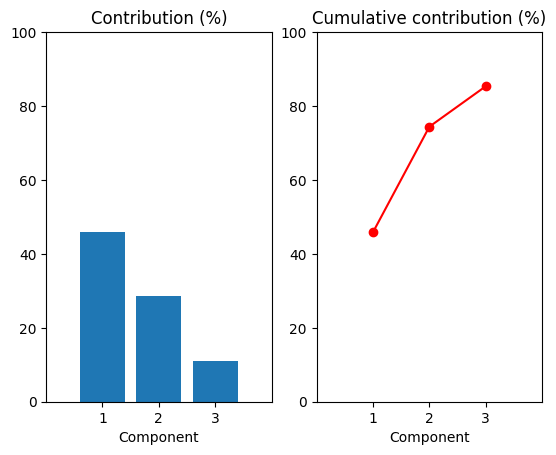

In [5]:
cum_pct = np.cumsum(pct)
x = np.arange(1,len(pct)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title('Contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, 'ro-')
plt.title('Cumulative contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

# Get / Isolate Alpha

In [6]:
X = np.asarray(portfolio_returns)

factor_returns = X.dot(pca_components.T)

factor_returns = pd.DataFrame(
    columns=["f1", "f2", "f3"], 
    index=portfolio_returns.index,
    data=factor_returns
)

factor_returns.head()

,f1,f2,f3
Date,,,
2020-01-03,0.000578,-0.008291,-0.032669
2020-01-06,0.017969,-0.011470,-0.004547
2020-01-07,0.011979,-0.018153,-0.031247
2020-01-08,-0.021119,-0.083695,-0.028383
2020-01-09,-0.000543,-0.019468,0.039163


# Get portfolio returns by principle component

<AxesSubplot: >

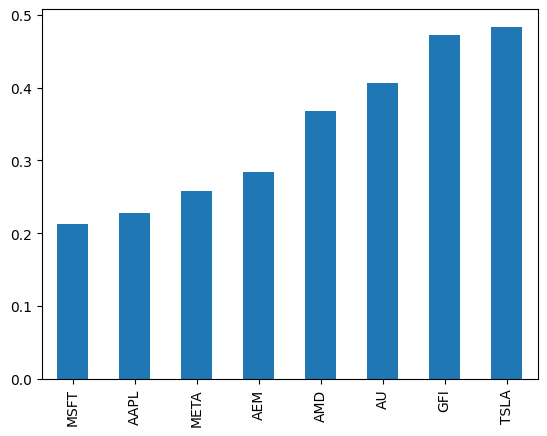

In [7]:
factor_exposures = pd.DataFrame(
    index=["f1", "f2", "f3"], 
    columns=portfolio_returns.columns,
    data = pca_components
).T

factor_exposures.f1.sort_values().plot.bar()

# Visualise - scatter plot

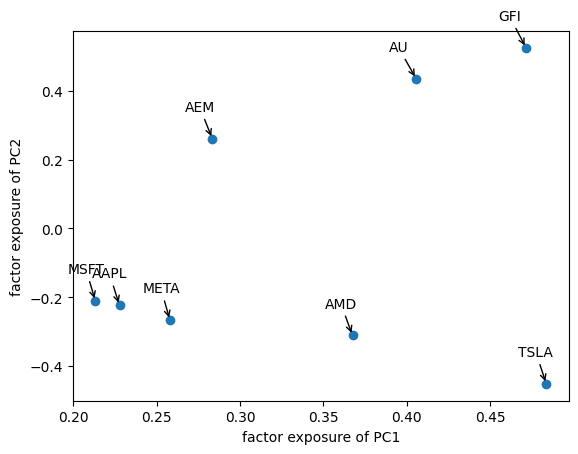

In [8]:
labels = factor_exposures.index
data = factor_exposures.values
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), 
        xytext=(-20, 20),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
    )